In [271]:
library(blsAPI)
library(dplyr)
library(tidyr)
library(ggplot2)
library(pastecs)

In [272]:
# retrieve unemployment rate data
response <- blsAPI('LNS14000000', return_data_frame = TRUE)
head(response)

year,period,periodName,value,seriesID
2020,M11,November,6.7,LNS14000000
2020,M10,October,6.9,LNS14000000
2020,M09,September,7.9,LNS14000000
2020,M08,August,8.4,LNS14000000
2020,M07,July,10.2,LNS14000000
2020,M06,June,11.1,LNS14000000


In [273]:
# Remove unwanted columns
df_emp = subset(response, select = -c(period,seriesID))
head(df_emp)

year,periodName,value
2020,November,6.7
2020,October,6.9
2020,September,7.9
2020,August,8.4
2020,July,10.2
2020,June,11.1


In [274]:
# rename columns
colnames(df_emp) <- c('year', 'month', 'unemployment_rate')

In [275]:
# Retrieve mean earnings per hour data
response2 <- blsAPI('CES0500000003', return_data_frame = TRUE)
head(response2)

year,period,periodName,value,seriesID
2020,M11,November,29.58,CES0500000003
2020,M10,October,29.49,CES0500000003
2020,M09,September,29.47,CES0500000003
2020,M08,August,29.45,CES0500000003
2020,M07,July,29.35,CES0500000003
2020,M06,June,29.32,CES0500000003


In [276]:
# Remove unwanted columns
df_earn = subset(response2, select = -c(period,seriesID))
head(df_earn)

year,periodName,value
2020,November,29.58
2020,October,29.49
2020,September,29.47
2020,August,29.45
2020,July,29.35
2020,June,29.32


In [277]:
# rename columns
colnames(df_earn) <- c('year', 'month', 'hourly_pay')

In [278]:
# combine earnings and unemployment data
df <- merge(df_emp, df_earn, all.df_emp=TRUE)

In [279]:
# check data types
str(df)

'data.frame':	35 obs. of  4 variables:
 $ year             : chr  "2018" "2018" "2018" "2018" ...
 $ month            : chr  "April" "August" "December" "February" ...
 $ unemployment_rate: chr  "4.0" "3.8" "3.9" "4.1" ...
 $ hourly_pay       : chr  "26.91" "27.22" "27.54" "26.75" ...


In [280]:
# convert numbers to numeric
df$unemployment_rate <- as.numeric(as.character(df$unemployment_rate))
df$hourly_pay <- as.numeric(as.character(df$hourly_pay))

In [281]:
# turn off sci notation
options(scipen=100)
cat('Unemployment rate statistcs \n\n')
# get statistics summary
print(stat.desc(df$unemployment_rate), digits = 2)

Unemployment rate statistcs 

     nbr.val     nbr.null       nbr.na          min          max        range 
       35.00         0.00         0.00         3.50        14.70        11.20 
         sum       median         mean      SE.mean CI.mean.0.95          var 
      181.40         3.80         5.18         0.50         1.01         8.64 
     std.dev     coef.var 
        2.94         0.57 


In [282]:
cat('Hourly pay statistcs \n\n')
print(stat.desc(df$hourly_pay), digits = 2)
options(warn=-1)

Hourly pay statistcs 

     nbr.val     nbr.null       nbr.na          min          max        range 
      35.000        0.000        0.000       26.710       30.030        3.320 
         sum       median         mean      SE.mean CI.mean.0.95          var 
     983.230       27.960       28.092        0.163        0.330        0.926 
     std.dev     coef.var 
       0.962        0.034 


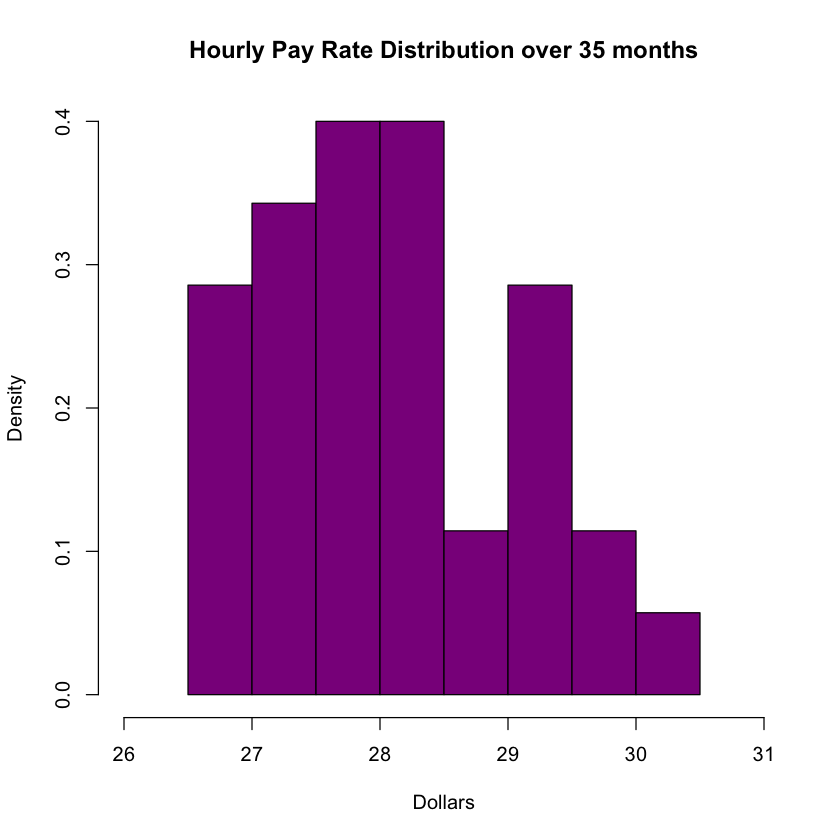

In [283]:
# create histogram of pay rate
hist(df$hourly_pay,
main='Hourly Pay Rate Distribution over 35 months',
xlab='Dollars',
xlim=c(26,31),
col="darkmagenta",
freq=FALSE
)

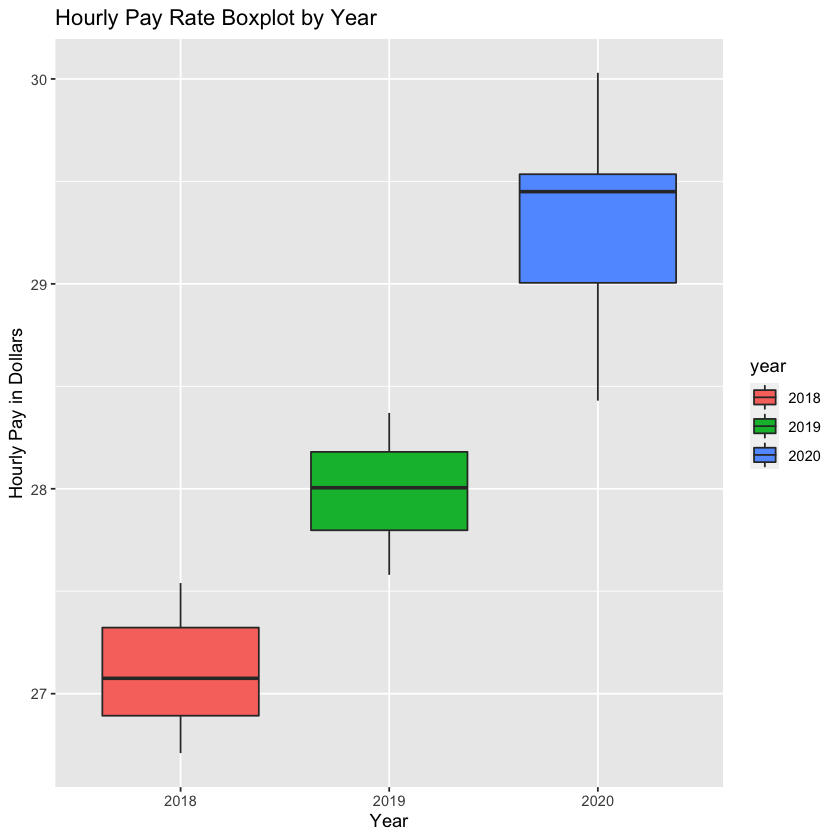

In [284]:
# create boxplot of hourly pay rates
ggplot(df, aes(x=year, y=hourly_pay, fill=year)) + geom_boxplot()+
ggtitle('Hourly Pay Rate Boxplot by Year') +
  xlab('Year') + ylab('Hourly Pay in Dollars')

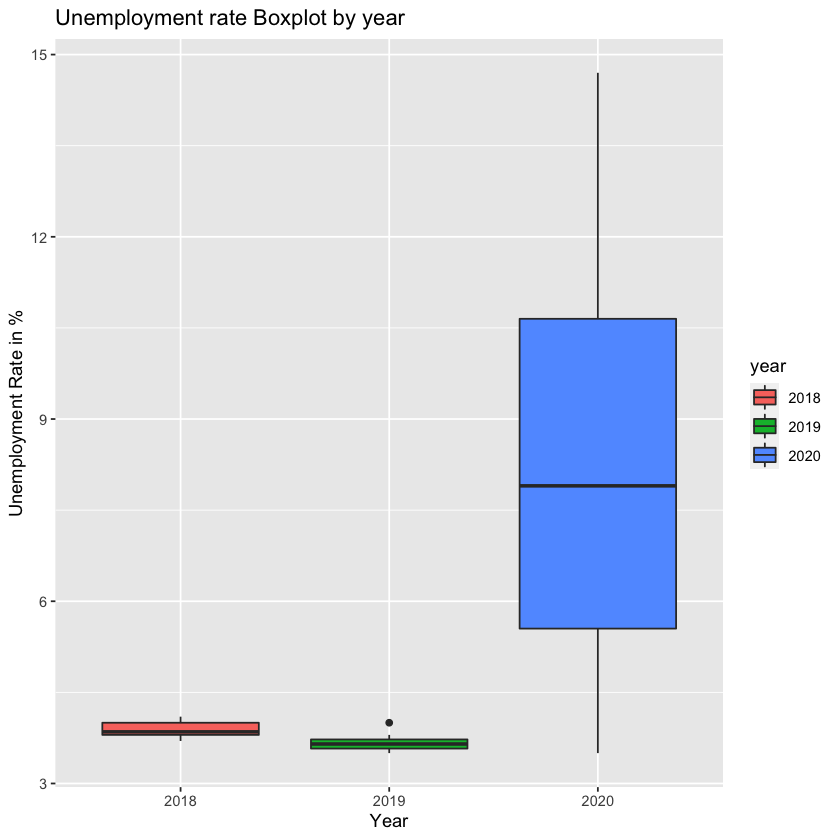

In [285]:
# create boxplot of unemployment rates
ggplot(df, aes(x=year, y=unemployment_rate, fill=year)) + geom_boxplot()+
ggtitle('Unemployment rate Boxplot by year') +
  xlab('Year') + ylab('Unemployment Rate in %')

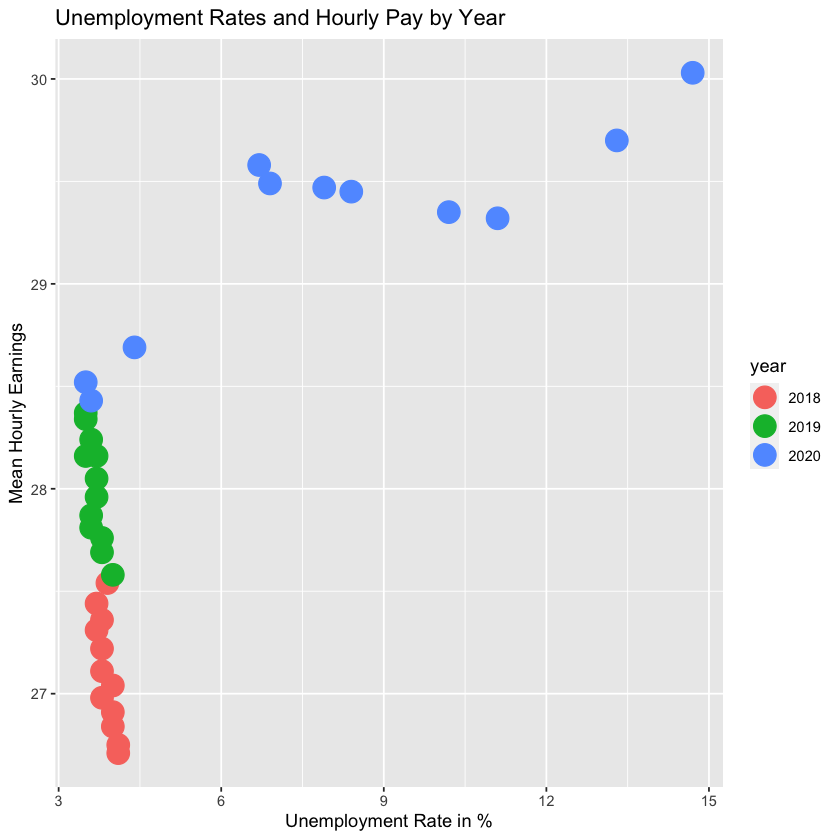

In [286]:
# create scatterplot
ggplot(df, aes(x=unemployment_rate, y=hourly_pay, color=year)) + 
    geom_point(size=6) +
ggtitle('Unemployment Rates and Hourly Pay by Year') +
  xlab('Unemployment Rate in %') + ylab('Mean Hourly Earnings')

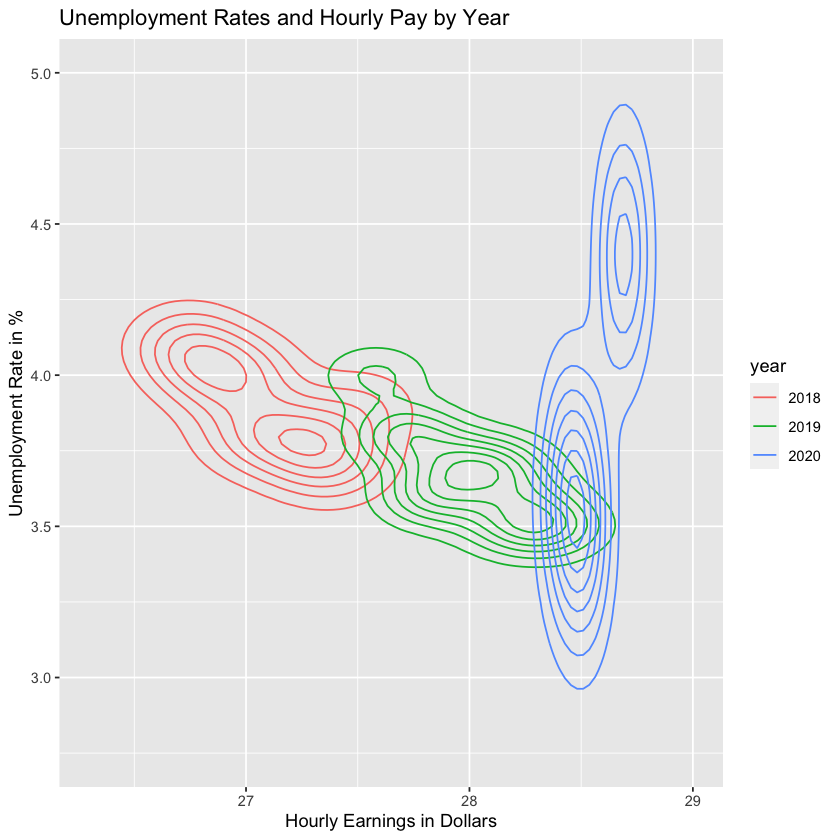

In [287]:
ggplot(df, aes(x=hourly_pay, y=unemployment_rate, color=year)) + 
geom_density_2d() + 
ylim(2.75, 5) +
xlim(26.3,29) +
ggtitle('Unemployment Rates and Hourly Pay by Year') +
  xlab('Hourly Earnings in Dollars') + ylab('Unemployment Rate in %')

In [288]:
# display data classes
class = sapply(df, class)
var_class = t(class)
var_class

year,month,unemployment_rate,hourly_pay
character,character,numeric,numeric


In [289]:
# convert to df, prepare index
var_class = as.data.frame(var_class, header=FALSE)
var_class['index'] = 'dtype'

In [290]:
# set index
rownames(var_class) <- var_class$index
var_class$index = NULL

In [291]:
# create basic stats summary and add to dtype
basic_stats = do.call(cbind, lapply(df, summary))
summary_report = rbind(basic_stats,var_class)

In [294]:
# give basic statistics and data types of variables
summary_report

,year,month,unemployment_rate,hourly_pay
Min.,35,35,3.5,26.71
1st Qu.,character,character,3.7,27.335
Median,character,character,3.8,27.96
Mean,35,35,5.18285714285714,28.0922857142857
3rd Qu.,character,character,4.25,28.605
Max.,character,character,14.7,30.03
dtype,character,character,numeric,numeric


The year and month variables are categorical and evenly spread through the set. The unemployment rate is much higher due to the pandemic, but interestingly hourly pay rates increased as the unemployment rate rose. The pay rates actually increased more in 2020 than in 2019.

In [ ]:
# Save BLS data to .csv file
write.csv(df,'bls_unemp_pay.csv')